<a href="https://colab.research.google.com/github/leechibao2k2/AI/blob/main/TTTN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
file_path = '/content/drive/MyDrive/Colab Notebooks/machine-test.csv'

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import warnings
warnings.filterwarnings('ignore')


In [ ]:
import pandas as pd
df = pd.read_csv(file_path)
df

,text,label
0,There are many different opinions on whether o...,1
1,The university education is not only for prepa...,1
2,"University education is a contentious issue, w...",1
3,University education has always been a topic o...,1
4,The college is not only a time of preparition ...,1
...,...,...
1723,There has been a fuss about the Elector Colleg...,0
1724,Limiting car usage has many advantages. Such a...,0
1725,There's a new trend that has been developing f...,0
1726,As we all know cars are a big part of our soci...,0


In [ ]:
import pandas as pd
import torch
from transformers import GPT2Tokenizer, GPT2Model

# Load pre-trained model and tokenizer
model_name = "gpt2"
tokenizer = GPT2Tokenizer.from_pretrained(model_name)
tokenizer.pad_token = tokenizer.eos_token
model = GPT2Model.from_pretrained(model_name)

# Function to encode text using Transformer model
def encode_text(text):
    tokens = tokenizer.encode(text, add_special_tokens=True, truncation=True, max_length=512, padding='max_length', return_tensors='pt')
    with torch.no_grad():
        outputs = model(tokens)

    encoded_text = outputs.last_hidden_state.mean(dim=1).squeeze()
    return encoded_text



# Encode essays
encoded_essays = []
for essay_text in df['text']:
    encoded_essay = encode_text(essay_text)
    encoded_essays.append(encoded_essay)

# Convert list of tensors to tensor
encoded_essays_tensor = torch.stack(encoded_essays)

# Save encoded essays
torch.save(encoded_essays_tensor, "/content/drive/MyDrive/Colab Notebooks/encoded_essays_gpt2.pt")

# Display encoded essays
print("Encoded essays:")
print(encoded_essays_tensor)


KeyboardInterrupt: 

In [ ]:
import pandas as pd
import torch
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score

# Load encoded essays tensor
loaded_tensor = torch.load("/content/drive/MyDrive/Colab Notebooks/encoded_essays_gpt2.pt")
labels = df['label']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(loaded_tensor, labels, test_size=0.2, random_state=42)

# Train Logistic Regression model
lr_model = LogisticRegression()
lr_model.fit(X_train, y_train)

# Train kNN model
knn_model = KNeighborsClassifier()
knn_model.fit(X_train, y_train)

# Evaluate models
lr_pred = lr_model.predict(X_test)
knn_pred = knn_model.predict(X_test)

lr_accuracy = accuracy_score(y_test, lr_pred)
knn_accuracy = accuracy_score(y_test, knn_pred)

lr_f1 = f1_score(y_test, lr_pred)
knn_f1 = f1_score(y_test, knn_pred)

lr_precision = precision_score(y_test, lr_pred)
knn_precision = precision_score(y_test, knn_pred)

lr_recall = recall_score(y_test, lr_pred)
knn_recall = recall_score(y_test, knn_pred)

# Create results DataFrame
results_df = pd.DataFrame({
    "Model": ["Logistic Regression", "kNN"],
    "Accuracy": [lr_accuracy, knn_accuracy],
    "F-score": [lr_f1, knn_f1],
    "Precision": [lr_precision, knn_precision],
    "Recall": [lr_recall, knn_recall]
})

# Display results
results_df

,Model,Accuracy,F-score,Precision,Recall
0,Logistic Regression,1.000000,1.000000,1.000000,1.000000
1,kNN,0.971098,0.923077,0.983607,0.869565


In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, Dense
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score

# Assume encoded_essays_tensor contains encoded essays and labels contain corresponding labels
encoded_essays_tensor = torch.load("/content/drive/MyDrive/Colab Notebooks/encoded_essays_gpt2.pt")
labels = df['label']

# Convert PyTorch tensor to NumPy array
encoded_essays_np = encoded_essays_tensor.numpy()

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(encoded_essays_np, labels, test_size=0.2, random_state=42)

# Reshape data for RNN input
X_train = X_train.reshape(X_train.shape[0], 1, -1)  # Reshape to (samples, time steps, features)
X_test = X_test.reshape(X_test.shape[0], 1, -1)

# Define the RNN model
model = Sequential([
    SimpleRNN(128),  # SimpleRNN layer with 128 units
    Dense(1, activation='sigmoid')  # Output layer for binary classification
])

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.1)

# Predict probabilities
y_prob = model.predict(X_test)

# Convert probabilities to binary predictions
rnn_pred = (y_prob > 0.5).astype(int)

# Evaluate the model
rnn_accuracy = accuracy_score(y_test, rnn_pred)
rnn_f1 = f1_score(y_test, rnn_pred)
rnn_precision = precision_score(y_test, rnn_pred)
rnn_recall = recall_score(y_test, rnn_pred)

print("Accuracy:", rnn_accuracy)
print("F1 Score:", rnn_f1)
print("Precision:", rnn_precision)
print("Recall:", rnn_recall)


Epoch 1/10
39/39 [==============================] - 3s 16ms/step - loss: 0.2500 - accuracy: 0.8866 - val_loss: 0.0530 - val_accuracy: 1.0000
Epoch 2/10
39/39 [==============================] - 0s 8ms/step - loss: 0.0362 - accuracy: 0.9976 - val_loss: 0.0171 - val_accuracy: 1.0000
Epoch 3/10
39/39 [==============================] - 0s 7ms/step - loss: 0.0170 - accuracy: 0.9992 - val_loss: 0.0122 - val_accuracy: 1.0000
Epoch 4/10
39/39 [==============================] - 0s 7ms/step - loss: 0.0117 - accuracy: 1.0000 - val_loss: 0.0060 - val_accuracy: 1.0000
Epoch 5/10
39/39 [==============================] - 0s 8ms/step - loss: 0.0069 - accuracy: 1.0000 - val_loss: 0.0038 - val_accuracy: 1.0000
Epoch 6/10
39/39 [==============================] - 0s 5ms/step - loss: 0.0052 - accuracy: 0.9992 - val_loss: 0.0033 - val_accuracy: 1.0000
Epoch 7/10
39/39 [==============================] - 0s 5ms/step - loss: 0.0046 - accuracy: 1.0000 - val_loss: 0.0041 - val_accuracy: 1.0000
Epoch 8/10
39/39 [=

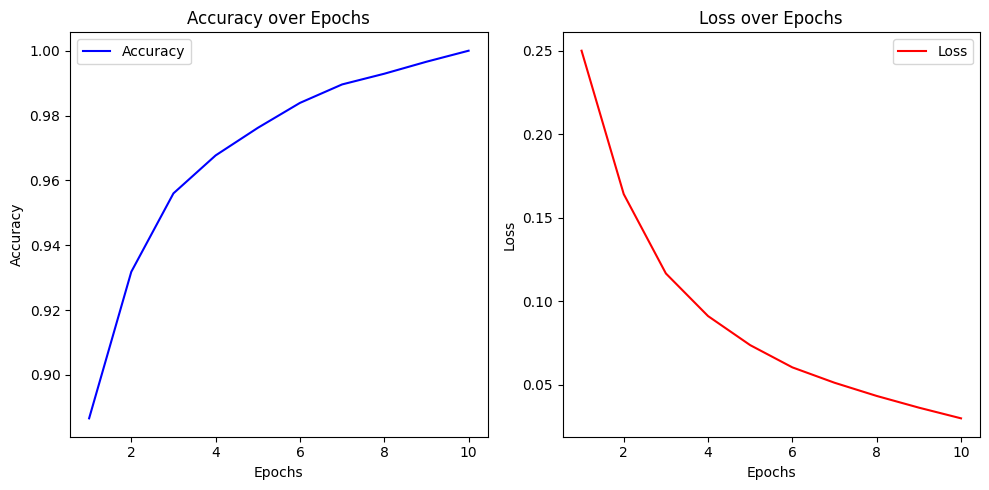

In [ ]:
import matplotlib.pyplot as plt

# Định nghĩa các chỉ số đánh giá (accuracy, loss) qua từng epoch
accuracy = [0.8866, 0.9318, 0.9560, 0.9677, 0.9762, 0.9839, 0.9896, 0.9929, 0.9966, 1.0000]  # Accuracy qua từng epoch
loss = [0.2500, 0.1642, 0.1167, 0.0912, 0.0738, 0.0605, 0.0513, 0.0434, 0.0364, 0.0300]  # Loss qua từng epoch

# Số lượng epoch
epochs = range(1, len(accuracy) + 1)

# Vẽ biểu đồ
plt.figure(figsize=(10, 5))

# Biểu đồ Accuracy
plt.subplot(1, 2, 1)
plt.plot(epochs, accuracy, 'b', label='Accuracy')
plt.title('Accuracy over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Biểu đồ Loss
plt.subplot(1, 2, 2)
plt.plot(epochs, loss, 'r', label='Loss')
plt.title('Loss over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

In [ ]:
# Create results DataFrame
results_df = pd.DataFrame({
    "Model": ["Logistic Regression", "kNN", "RNN"],
    "Accuracy": [lr_accuracy, knn_accuracy, rnn_accuracy],
    "F-score": [lr_f1, knn_f1, rnn_f1],
    "Precision": [lr_precision, knn_precision, rnn_precision],
    "Recall": [lr_recall, knn_recall, rnn_recall]
})

results_df

,Model,Accuracy,F-score,Precision,Recall
0,Logistic Regression,1.000000,1.000000,1.000000,1.000000
1,kNN,0.971098,0.923077,0.983607,0.869565
2,RNN,0.997110,0.992806,0.985714,1.000000


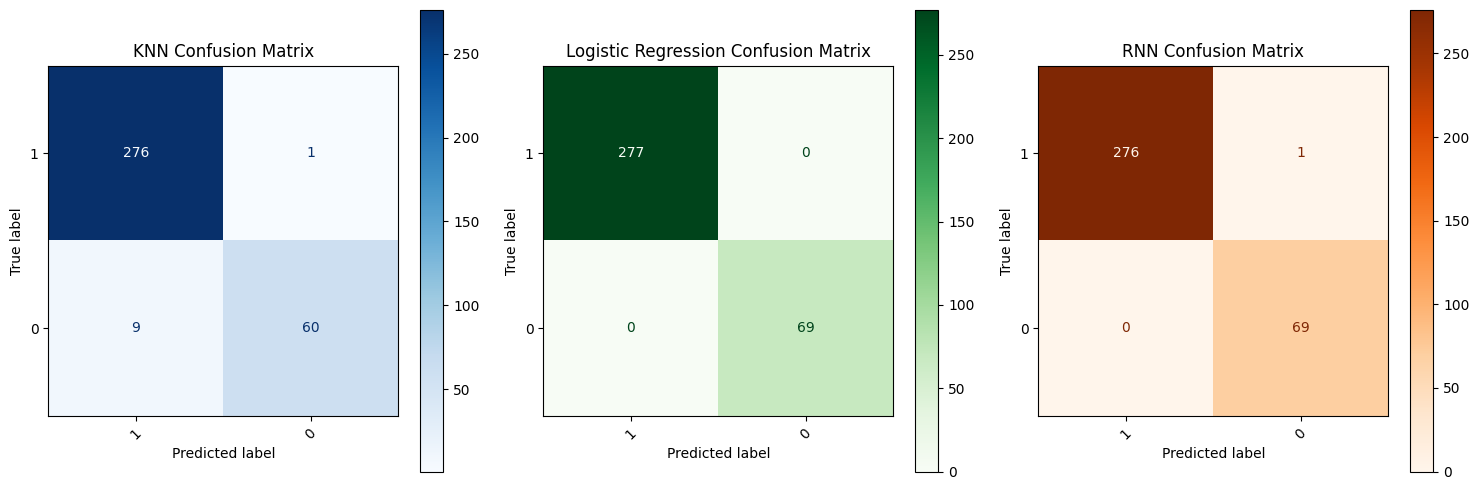

In [ ]:
import matplotlib.pyplot as plt
from sklearn import metrics

# KNN Confusion Matrix
confusion_matrix_knn = metrics.confusion_matrix(y_test, knn_pred)

# Logistic Regression Confusion Matrix
confusion_matrix_lr = metrics.confusion_matrix(y_test, lr_pred)

# RNN Confusion Matrix
confusion_matrix_rnn = metrics.confusion_matrix(y_test, rnn_pred)

# Tạo subplots
fig, axs = plt.subplots(1, 3, figsize=(15, 5))

# KNN Confusion Matrix
cm_display_knn = metrics.ConfusionMatrixDisplay(confusion_matrix=confusion_matrix_knn, display_labels=[1, 0])
cm_display_knn.plot(ax=axs[0], cmap='Blues', xticks_rotation=45)
axs[0].set_title('KNN Confusion Matrix')

# Logistic Regression Confusion Matrix
cm_display_lr = metrics.ConfusionMatrixDisplay(confusion_matrix=confusion_matrix_lr, display_labels=[1, 0])
cm_display_lr.plot(ax=axs[1], cmap='Greens', xticks_rotation=45)
axs[1].set_title('Logistic Regression Confusion Matrix')

# RNN Confusion Matrix
cm_display_rnn = metrics.ConfusionMatrixDisplay(confusion_matrix=confusion_matrix_rnn, display_labels=[1, 0])
cm_display_rnn.plot(ax=axs[2], cmap='Oranges', xticks_rotation=45)
axs[2].set_title('RNN Confusion Matrix')

plt.tight_layout()
plt.show()


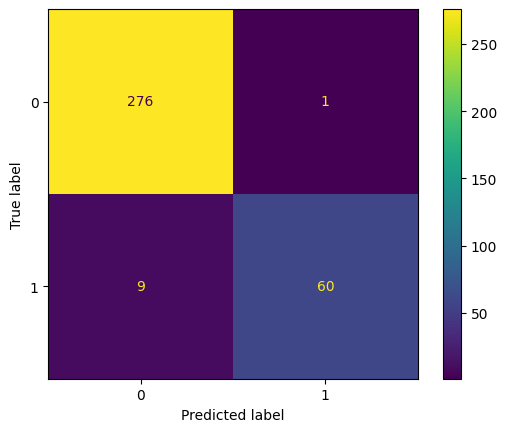

In [ ]:
import matplotlib.pyplot as plt
import numpy
from sklearn import metrics

#KNN
confusion_matrix = metrics.confusion_matrix(y_test, knn_pred)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [0, 1])

cm_display.plot()
plt.show()

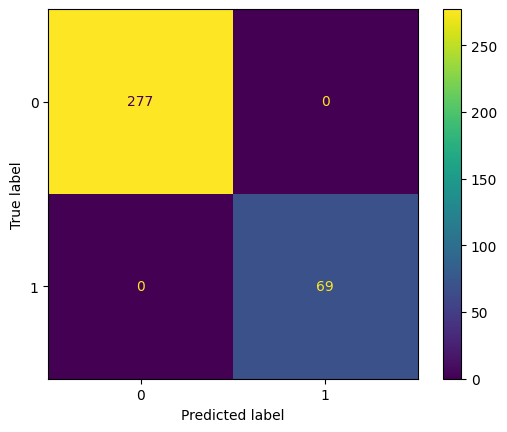

In [ ]:
import matplotlib.pyplot as plt
import numpy
from sklearn import metrics

#Lr
confusion_matrix = metrics.confusion_matrix(y_test, lr_pred)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [0, 1])

cm_display.plot()
plt.show()

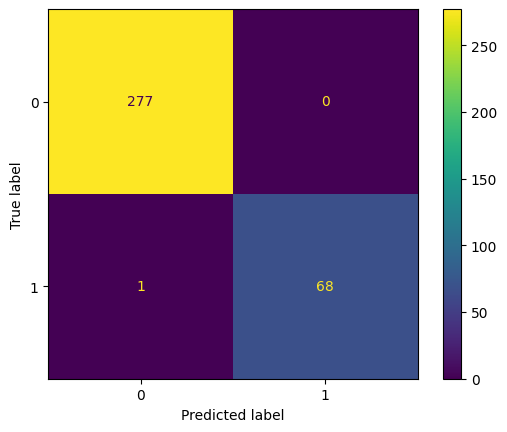

In [ ]:
import matplotlib.pyplot as plt
import numpy
from sklearn import metrics

#RNN
confusion_matrix = metrics.confusion_matrix(y_test, rnn_pred)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [0, 1])

cm_display.plot()
plt.show()

In [ ]:
import numpy as np
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier

# Logistic Regression
lr_model = LogisticRegression()
lr_scores = cross_val_score(lr_model, encoded_essays_np, labels, cv=5, scoring='accuracy')
print("Logistic Regression Cross-Validation Accuracy:", np.mean(lr_scores))

# kNN
knn_model = KNeighborsClassifier()
knn_scores = cross_val_score(knn_model, encoded_essays_np, labels, cv=5, scoring='accuracy')
print("kNN Cross-Validation Accuracy:", np.mean(knn_scores))


Logistic Regression Cross-Validation Accuracy: 0.9965267655189745
kNN Cross-Validation Accuracy: 0.9785741811175337


In [ ]:
import numpy as np
from sklearn.model_selection import StratifiedKFold
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, Dense
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score


# Define number of folds for cross-validation
num_folds = 5
skf = StratifiedKFold(n_splits=num_folds)

# Initialize lists to store evaluation metrics for each fold
accuracy_list = []
f1_list = []
precision_list = []
recall_list = []

# Perform cross-validation
for train_index, test_index in skf.split(encoded_essays_np, labels):
    X_train, X_test = encoded_essays_np[train_index], encoded_essays_np[test_index]
    y_train, y_test = labels[train_index], labels[test_index]

    # Reshape data for RNN input
    X_train = X_train.reshape(X_train.shape[0], 1, -1)
    X_test = X_test.reshape(X_test.shape[0], 1, -1)

    # Define the RNN model
    model = Sequential([
        SimpleRNN(128),  # SimpleRNN layer with 128 units
        Dense(1, activation='sigmoid')  # Output layer for binary classification
    ])

    # Compile the model
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

    # Train the model
    model.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.1, verbose=0)

    # Predict probabilities
    y_prob = model.predict(X_test)

    # Convert probabilities to binary predictions
    y_pred = (y_prob > 0.5).astype(int)

    # Evaluate the model
    accuracy = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)

    # Append evaluation metrics to lists
    accuracy_list.append(accuracy)
    f1_list.append(f1)
    precision_list.append(precision)
    recall_list.append(recall)

# Calculate mean evaluation metrics across folds
mean_accuracy = np.mean(accuracy_list)
mean_f1 = np.mean(f1_list)
mean_precision = np.mean(precision_list)
mean_recall = np.mean(recall_list)

print("Mean Accuracy:", mean_accuracy)
print("Mean F1 Score:", mean_f1)
print("Mean Precision:", mean_precision)
print("Mean Recall:", mean_recall)



11/11 [==============================] - 0s 2ms/step
Mean Accuracy: 0.998262545028064
Mean F1 Score: 0.9956830095590503
Mean Precision: 1.0
Mean Recall: 0.9914688128772635


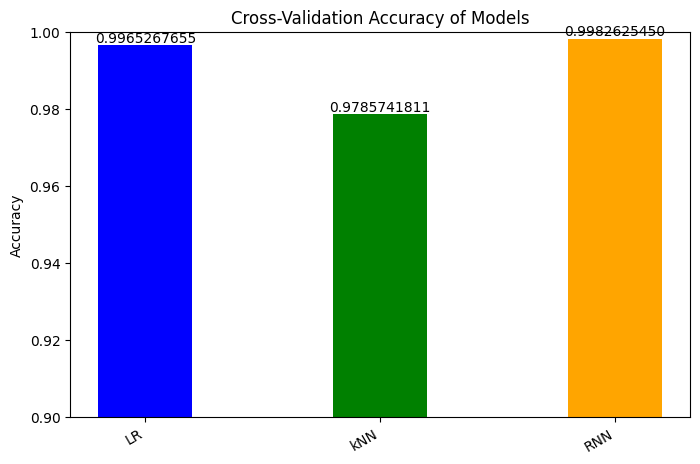

In [ ]:
import matplotlib.pyplot as plt

# Kết quả cross-validation
models = ['LR', 'kNN', 'RNN']
accuracies = [np.mean(lr_scores), np.mean(knn_scores), mean_accuracy]

# Trực quan hóa
plt.figure(figsize=(8, 5))
bars = plt.bar(models, accuracies, color=['blue', 'green', 'orange'], width=0.4)  # Điều chỉnh độ rộng của cột

plt.ylabel('Accuracy')
plt.title('Cross-Validation Accuracy of Models')
plt.ylim(0.9, 1.0)  # Đặt giới hạn trục y để dễ nhìn thấy sự khác biệt
plt.gca().set_xticklabels(models, rotation=30, ha='right')

# Hiển thị số liệu trên đầu cột
for bar, accuracy in zip(bars, accuracies):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), f'{accuracy:.10f}',
             ha='center', va='bottom')

plt.show()


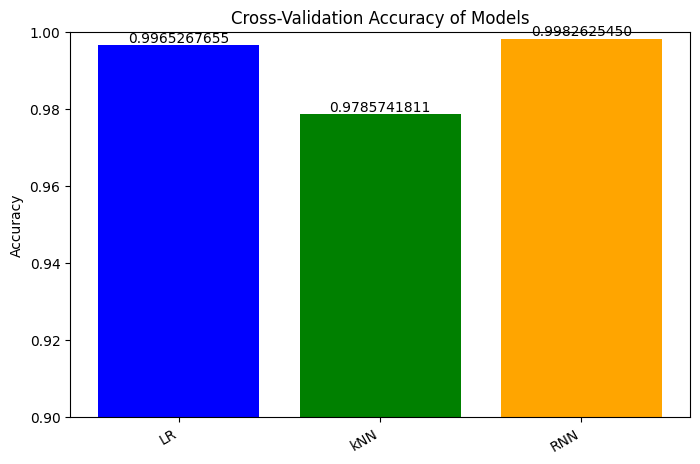

In [ ]:
import matplotlib.pyplot as plt

# Kết quả cross-validation
models = ['LR', 'kNN', 'RNN']
accuracies = [np.mean(lr_scores), np.mean(knn_scores), mean_accuracy]

# Trực quan hóa
plt.figure(figsize=(8, 5))
bars = plt.bar(models, accuracies, color=['blue', 'green', 'orange'])

plt.ylabel('Accuracy')
plt.title('Cross-Validation Accuracy of Models')
plt.ylim(0.9, 1.0)  # Đặt giới hạn trục y để dễ nhìn thấy sự khác biệt
plt.gca().set_xticklabels(models, rotation=30, ha='right')

# Hiển thị số liệu trên đầu cột
for bar, accuracy in zip(bars, accuracies):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), f'{accuracy:.10f}',
             ha='center', va='bottom')

plt.show()
